# Explanation:

This Database Contains Movies Created By Several Directors In The World.

This Database Can Be Seen At: https://www.kaggle.com/luizpaulodeoliveira/imdb-project-sql

This Database Contains Two Tables. The First Table Is Called 'directors', Contains The Name Of The Director And His Gender. The Second Table Is Called 'movies', Contains The Title Of The Movies, budget, revenue, popularity, etc.

From This database, You Can Find Out The Best Movies Based On Income, Popularity And Votes. In Addition, You Can Also Find Out The Best Director Based On The Amount Of Revenue From All His Movies.

The Correlation Coefficient Of These Two Tables Can Show The Effect Of Each Column To The Other Column.

**Analysis on IMDB using sqlite3,numpy,pandas and some visualisation libraries such as Matplotlib and Seaborn.**

In [31]:
# import numpy and pandas for mathematical functions and frameworks
import numpy as np
import pandas as pd

# importing libraries for visualisation
import seaborn as sb
import matplotlib.pyplot as plt

import sqlite3

#suppress warnings
import warnings
warnings.filterwarnings('ignore')

In [32]:
#importing dataset and forming connection to interact with sql database
db = "/content/drive/MyDrive/movies.sqlite"
conn = sqlite3.connect(db)
cur =conn.cursor()

# **Q1) Can you get all data about movies ?**

In [33]:
cur.execute("Select * FROM movies")

movies = cur.fetchall()

movies = pd.DataFrame(movies,columns= ['id', 'original_title', 'budget', 'popularity', 'release_date', 'revenue', 'title', 'vote_average', 
                                       'vote_count', 'overview', 'tagline', 'uid', 'director_id'])

print("Shape of movies data = ",movies.shape)
print("\n\n\n")
movies.head(5)

Shape of movies data =  (4773, 13)






,id,original_title,budget,popularity,release_date,revenue,title,vote_average,vote_count,overview,tagline,uid,director_id
0,43597,Avatar,237000000,150,2009-12-10,2787965087,Avatar,7.2,11800,"In the 22nd century, a paraplegic Marine is di...",Enter the World of Pandora.,19995,4762
1,43598,Pirates of the Caribbean: At World's End,300000000,139,2007-05-19,961000000,Pirates of the Caribbean: At World's End,6.9,4500,"Captain Barbossa, long believed to be dead, ha...","At the end of the world, the adventure begins.",285,4763
2,43599,Spectre,245000000,107,2015-10-26,880674609,Spectre,6.3,4466,A cryptic message from Bond’s past sends him o...,A Plan No One Escapes,206647,4764
3,43600,The Dark Knight Rises,250000000,112,2012-07-16,1084939099,The Dark Knight Rises,7.6,9106,Following the death of District Attorney Harve...,The Legend Ends,49026,4765
4,43601,John Carter,260000000,43,2012-03-07,284139100,John Carter,6.1,2124,"John Carter is a war-weary, former military ca...","Lost in our world, found in another.",49529,4766


In [34]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4773 entries, 0 to 4772
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              4773 non-null   int64  
 1   original_title  4773 non-null   object 
 2   budget          4773 non-null   int64  
 3   popularity      4773 non-null   int64  
 4   release_date    4773 non-null   object 
 5   revenue         4773 non-null   int64  
 6   title           4773 non-null   object 
 7   vote_average    4773 non-null   float64
 8   vote_count      4773 non-null   int64  
 9   overview        4770 non-null   object 
 10  tagline         3951 non-null   object 
 11  uid             4773 non-null   int64  
 12  director_id     4773 non-null   int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 484.9+ KB


# **Q2) How do you get all data about directors?**

In [35]:
cur.execute("select * from directors")
directors= cur.fetchall()

directors =pd.DataFrame(directors,columns = ['name', 'id', 'gender', 'uid', 'department'])

print("shape of directors table = ", directors.shape)
print("\n\n\n")

directors.head()

shape of directors table =  (2349, 5)






,name,id,gender,uid,department
0,James Cameron,4762,2,2710,Directing
1,Gore Verbinski,4763,2,1704,Directing
2,Sam Mendes,4764,2,39,Directing
3,Christopher Nolan,4765,2,525,Directing
4,Andrew Stanton,4766,2,7,Directing


In [36]:
directors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2349 entries, 0 to 2348
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        2349 non-null   object
 1   id          2349 non-null   int64 
 2   gender      2349 non-null   int64 
 3   uid         2349 non-null   int64 
 4   department  2349 non-null   object
dtypes: int64(3), object(2)
memory usage: 91.9+ KB


# **Q3) Check how many movies are present in IMDB.**

In [37]:
cur.execute("select count(*) from movies")
count = cur.fetchall()

print("Number of movies present are :", count)

Number of movies present are : [(4773,)]


# **Q4) Find these 3 directors: James Cameron ; Luc Besson ; John Woo**

In [38]:
cur.execute("select * from directors where name == 'James Cameron' or name =='luc Besson'or name=='John Woo'")
dir3 = cur.fetchall()

print("These 3 directors are :",dir3)


These 3 directors are : [('James Cameron', 4762, 2, 2710, 'Directing'), ('John Woo', 4893, 2, 11401, 'Directing')]


# **Q5)  Find all directors with name starting with Steven.**

In [39]:
cur.execute("select * from directors where name like 'Steven%' ")

dir = cur.fetchall()

print("Directors with name starting as Steven are:", dir)


Directors with name starting as Steven are: [('Steven Spielberg', 4799, 2, 488, 'Directing'), ('Steven Soderbergh', 4909, 2, 1884, 'Directing'), ('Steven Brill', 5013, 2, 32593, 'Directing'), ('Steven Zaillian', 5117, 2, 2260, 'Directing'), ('Steven Quale', 5216, 2, 93214, 'Directing'), ('Steven Seagal', 5221, 2, 23880, 'Directing'), ('Steven E. de Souza', 5390, 2, 1726, 'Directing'), ('Steven Shainberg', 5803, 2, 67795, 'Directing'), ('Steven R. Monroe', 6713, 2, 88039, 'Directing')]


# Q6) Count female directors.

In [40]:
cur.execute("select count(*) from directors where gender=='1' ")
w_dir= cur.fetchall()

print("Number of female directors = ", w_dir)

Number of female directors =  [(150,)]


# Q7) Find the name of the 10th first women directors?

In [41]:
cur.execute("select name from directors where gender='1'order by id ASC limit 1 offset 10")
name= cur.fetchall()

print("Name of 10th first women director is : ", name)

Name of 10th first women director is :  [('Karyn Kusama',)]


# Q8) What are the 3 most popular movies?

In [42]:
cur.execute("select original_title from movies order by popularity DESC limit 3 ")
mov= cur.fetchall()

print("3 most popular movies are : ",mov)

3 most popular movies are :  [('Minions',), ('Interstellar',), ('Deadpool',)]


# Q9) What are the 3 most bankable movies?

In [43]:
cur.execute("select original_title from movies order by budget DESC limit 3")
b_mov = cur.fetchall()

print("3 most bankable movies are : ", b_mov)


3 most bankable movies are :  [('Pirates of the Caribbean: On Stranger Tides',), ("Pirates of the Caribbean: At World's End",), ('Avengers: Age of Ultron',)]


# Q10)  What is the most awarded average vote since the January 1st, 2000?

In [44]:
cur.execute("select original_title from movies where release_date > '2000-01-01' order by vote_average DESC limit 1 ")

nam= cur.fetchall()

print("Most awarded average-voted movie since 1 Jan 2000 is :  ",nam)

Most awarded average-voted movie since 1 Jan 2000 is :   [('Sardaarji',)]


# Q11) Which movie(s) were directed by Brenda Chapman?

In [45]:
cur.execute("select original_title from movies JOIN directors on movies.director_id = directors.id where name =='Brenda Chapman'")
mov=cur.fetchall()

print("Movies directed by Brenda Chapman : ",mov)


Movies directed by Brenda Chapman :  [('Brave',)]


# Q12) Whose director made the most movies?

In [46]:
cur.execute("select name from directors join movies on directors.id= movies.director_id GROUP BY(director_id) order by count(original_title)  DESC limit 1")

dirr = cur.fetchall()

print("The director who made the highest movies : ",dirr)

The director who made the highest movies :  [('Steven Spielberg',)]


# Q13) Whose director is the most bankable?

In [47]:
cur.execute("select name from directors join movies on directors.id=movies.director_id group by director_id order by sum(budget) DESC limit 1")
bmov=cur.fetchall()

print("Name of most bankable director : ",bmov)

Name of most bankable director :  [('Steven Spielberg',)]


#  Analysis on IMDB dataset



#  Budget Analysis 

**Question - List out Top 10 highest budget made movies**

In [48]:
cur.execute("select original_title,revenue,budget,release_date,name from movies join directors on movies.director_id=directors.id  order by budget DESC limit 10")
bud=cur.fetchall()

bud= pd.DataFrame(bud,columns = ["name","revenue","budget","release_date","director_name"])
bud.head(10)

,name,revenue,budget,release_date,director_name
0,Pirates of the Caribbean: On Stranger Tides,1045713802,380000000,2011-05-14,Rob Marshall
1,Pirates of the Caribbean: At World's End,961000000,300000000,2007-05-19,Gore Verbinski
2,Avengers: Age of Ultron,1405403694,280000000,2015-04-22,Joss Whedon
3,Superman Returns,391081192,270000000,2006-06-28,Bryan Singer
4,John Carter,284139100,260000000,2012-03-07,Andrew Stanton
5,Tangled,591794936,260000000,2010-11-24,Byron Howard
6,Spider-Man 3,890871626,258000000,2007-05-01,Sam Raimi
7,The Lone Ranger,89289910,255000000,2013-07-03,Gore Verbinski
8,The Dark Knight Rises,1084939099,250000000,2012-07-16,Christopher Nolan
9,Harry Potter and the Half-Blood Prince,933959197,250000000,2009-07-07,David Yates


# NOTE:

The bud Table Contains List Of Movies With Highest Production Costs.

For Your Information, Pirates of the Caribbean: On Stranger Tides, Directed By Rob Marshall, Is The Most Production Costs, It's USD 380,000,000.

# Popularity Analysis

**Question- List out Top 10 popularity on movies**

In [49]:
cur.execute("select original_title,revenue,popularity,release_date,name from movies join directors on movies.director_id=directors.id  order by popularity DESC limit 10")
pup=cur.fetchall()

pup= pd.DataFrame(pup,columns = ["name","revenue","popularity","release_date","director_name"])
pup.head(10)

,name,revenue,popularity,release_date,director_name
0,Minions,1156730962,875,2015-06-17,Kyle Balda
1,Interstellar,675120017,724,2014-11-05,Christopher Nolan
2,Deadpool,783112979,514,2016-02-09,Tim Miller
3,Guardians of the Galaxy,773328629,481,2014-07-30,James Gunn
4,Mad Max: Fury Road,378858340,434,2015-05-13,George Miller
5,Jurassic World,1513528810,418,2015-06-09,Colin Trevorrow
6,Pirates of the Caribbean: The Curse of the Bla...,655011224,271,2003-07-09,Gore Verbinski
7,Dawn of the Planet of the Apes,710644566,243,2014-06-26,Matt Reeves
8,The Hunger Games: Mockingjay - Part 1,752100229,206,2014-11-18,Francis Lawrence
9,Big Hero 6,652105443,203,2014-10-24,Chris Williams


# NOTE:

The pup table Shows 10 Movies With The Highest Ranking By Popularity.

Currently, Minions Directed By Kyle Balda Got The First Place With Score 875, Beating Interstellar(724) score As The Closest Competitor, Deadpool And The Other Competitors.

# Revenue Analysis

**Question - What are the top 10 Revenue movies**

In [50]:
cur.execute("select original_title,revenue,release_date,name from movies join directors on movies.director_id=directors.id  order by revenue DESC limit 10")
rev=cur.fetchall()

rev= pd.DataFrame(rev,columns = ["name","revenue","release_date","director_name"])
rev.head(10)

,name,revenue,release_date,director_name
0,Avatar,2787965087,2009-12-10,James Cameron
1,Titanic,1845034188,1997-11-18,James Cameron
2,The Avengers,1519557910,2012-04-25,Joss Whedon
3,Jurassic World,1513528810,2015-06-09,Colin Trevorrow
4,Furious 7,1506249360,2015-04-01,James Wan
5,Avengers: Age of Ultron,1405403694,2015-04-22,Joss Whedon
6,Frozen,1274219009,2013-11-27,Chris Buck
7,Iron Man 3,1215439994,2013-04-18,Shane Black
8,Minions,1156730962,2015-06-17,Kyle Balda
9,Captain America: Civil War,1153304495,2016-04-27,Anthony Russo


# NOTE:

The rev table shows the The 10 Movies that Got The Highest Gross Profit When Compared To The Other Movies.

It Turns Out That Avatar Directed By James Cameron Got A Gross Profit USD 2,787,965,087. It's Make Avatar In First Place, Followed By Titanic, The Avengers, Jurassic World, And Others.

From the above table , we can cocnclude that both of the two most grossing movies are directed by James Cameron.

Question - Display most popular movies with vote_average directed by James Cameron

In [51]:
cur.execute("select original_title,release_date,budget,revenue,popularity,vote_average from movies join directors on movies.director_id=directors.id where name='James Cameron' order by revenue DESC limit 10")
avg=cur.fetchall()

avg = pd.DataFrame(avg,columns=["movie","release_date","budget","revenue","popularity","voting_average"])
avg.head(10)

,movie,release_date,budget,revenue,popularity,voting_average
0,Avatar,2009-12-10,237000000,2787965087,150,7.2
1,Titanic,1997-11-18,200000000,1845034188,100,7.5
2,Terminator 2: Judgment Day,1991-07-01,100000000,520000000,101,7.7
3,True Lies,1994-07-14,115000000,378882411,38,6.8
4,Aliens,1986-07-18,18500000,183316455,67,7.7
5,The Abyss,1989-08-09,70000000,90000098,24,7.1
6,The Terminator,1984-10-26,6400000,78371200,74,7.3


**NOTE** 

The avg table shows all the movies directed by James Cameron.

# Voting Analysis

Question - List out Particular movie for Voting average and votecount

In [52]:
cur.execute("select original_title,release_date,budget,vote_average,vote_count,name from movies join directors on movies.director_id=directors.id order by vote_average DESC")
vot=cur.fetchall()

vot=pd.DataFrame(vot,columns =["movie_name","release_date","budget","vote_average","vote_count","name"])
vot.head(10)

,movie_name,release_date,budget,vote_average,vote_count,name
0,Stiff Upper Lips,1998-06-12,0,10.0,1,Gary Sinyor
1,"Dancer, Texas Pop. 81",1998-05-01,0,10.0,1,Tim McCanlies
2,Sardaarji,2015-06-26,0,9.5,2,Rohit Jugraj
3,One Man's Hero,1999-08-02,0,9.3,2,Lance Hool
4,The Shawshank Redemption,1994-09-23,25000000,8.5,8205,Frank Darabont
5,There Goes My Baby,1994-09-02,10500000,8.5,2,Floyd Mutrux
6,The Prisoner of Zenda,1937-09-03,0,8.4,11,John Cromwell
7,The Godfather,1972-03-14,6000000,8.4,5893,Francis Ford Coppola
8,Fight Club,1999-10-15,63000000,8.3,9413,David Fincher
9,Schindler's List,1993-11-29,22000000,8.3,4329,Steven Spielberg


# NOTE:

vot Table Contains The Best Movies By Vote. Stiff Upper Lips, Directed By Gary Sinyor And Dancer, Texas Pop. 81 Directed by the MacCanlies Was Successfully Becomes the Best Movies By Vote With Perfect Score, 10.

However, There Are Anomalies. It Turned Out That The Two Movies Were Only Vote By One Person. So, Likely to Affect The Assessment Results..

# CORRELATION

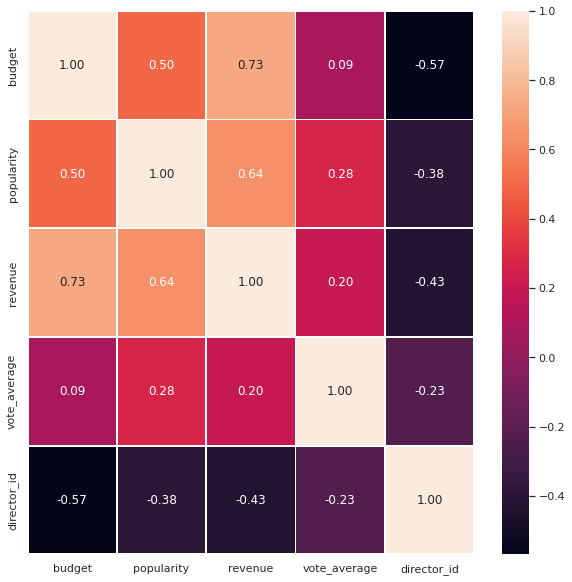

In [53]:
#checking correlation between several numerical attributes using heatmap from seaborn library

sb.set(rc = {'figure.figsize': (10, 10)})
sb.heatmap(movies[['budget', 'popularity', 'revenue', 'vote_average', 'director_id']].corr(), 
            annot = True, fmt = '.2f', linewidth = 0.8);

# NOTE on Correlation:

The Heat Map Graph Shows The Effect Between One Variable To The Other Variables. 

In The Graph, It Is Clear That budget Has The Greatest Impact on revenue with 0.73. 

Meanwhile, popularity Is Quite Impact On revenue, And director_id Which Means director_name Also Has A Correlation With revenue, Even Though It Is Small. 

However, vote_average Has A Very Small Correlation With revenue.

# Directors

Question- List out the director names with number of movies and revenue

In [54]:
cur.execute("select name,count(original_title),sum(revenue) from movies join directors on movies.director_id = directors.id group by name order by sum(revenue) DESC")
mostProfitableDirector=cur.fetchall()

mostProfitableDirector=pd.DataFrame(mostProfitableDirector,columns=["director_name","total_count_movies","total revenue"])
mostProfitableDirector.head(10)

,director_name,total_count_movies,total revenue
0,Steven Spielberg,27,9147393164
1,Peter Jackson,9,6498642820
2,James Cameron,7,5883569439
3,Michael Bay,12,5832524638
4,Christopher Nolan,8,4227483234
5,Chris Columbus,11,3725631503
6,Robert Zemeckis,13,3590622002
7,George Lucas,5,3339113893
8,Tim Burton,14,3337418241
9,Ridley Scott,16,3189557997


# NOTE:

The mostProfitableDirector Table Shows The Directors With The Highest Gross Profit.

Currently, Steven Spielberg Is The Director With The Most Gross Profit, with USD 9,147,393,164 from his 27 movies.

Then, Peter Jackson With USD 6,498,642,820, James Cameron With USD 5,883,569,439, And The Other Directors.

Question - Display all the number of movies for particular director and revenue .

In [55]:
cur.execute("select name,count(original_title),sum(revenue) from movies join directors on movies.director_id = directors.id group by name order by count(original_title) DESC")
mostProductiveDirector=cur.fetchall()

mostProductiveDirector=pd.DataFrame(mostProductiveDirector,columns=["director_name","total_count_movies","total revenue"])
mostProductiveDirector.head(10)

,director_name,total_count_movies,total revenue
0,Steven Spielberg,27,9147393164
1,Woody Allen,21,669101038
2,Clint Eastwood,20,2512058888
3,Martin Scorsese,20,1956635998
4,Ridley Scott,16,3189557997
5,Robert Rodriguez,16,1109899581
6,Spike Lee,16,340618771
7,Renny Harlin,15,1031500590
8,Steven Soderbergh,15,2114864443
9,Oliver Stone,14,1278048615


# NOTE:

The mostProductiveDirector Table Contains The Name Of The Director And The Number Of Movies It Has Directed By Him.

Steven Spielberg Is The Most Productive Director With 27 Movies Titles He Has Directed. Meanwhile, Woody Allen Has Only 21 Movies Titles.

Then, Martin Scorsese And Clint Eastwood With 20 Movies Titles.

Question- By doing Director analysis We know Steven Spielberg is the highest revenue, so list the Steven Spielberg movies info

In [56]:
cur.execute("select original_title,release_date,budget,revenue,vote_average,vote_count from movies join directors on movies.director_id=directors.id where name='Steven Spielberg' order by release_date DESC")
inf=cur.fetchall()

inf=pd.DataFrame(inf,columns=["movie","release_date","budget","revenue","vote_average","vote_count"])

inf

,movie,release_date,budget,revenue,vote_average,vote_count
0,The BFG,2016-06-01,140000000,183345589,6.0,1000
1,Bridge of Spies,2015-10-15,40000000,165478348,7.2,2583
2,Lincoln,2012-11-09,65000000,275293450,6.7,1429
3,War Horse,2011-12-25,66000000,177584879,7.0,992
4,The Adventures of Tintin,2011-10-25,130000000,371940071,6.7,2061
5,Indiana Jones and the Kingdom of the Crystal S...,2008-05-21,185000000,786636033,5.7,2495
6,Munich,2005-12-22,70000000,130358911,6.9,696
7,War of the Worlds,2005-06-28,132000000,591739379,6.2,2322
8,The Terminal,2004-06-17,60000000,219417255,7.0,1910
9,Catch Me If You Can,2002-12-25,52000000,352114312,7.7,3795


# NOTE:

From Two Tables Above, mostProfitableDirector And mostProductiveDirector, It Can Be Seen That Steven Spielberg Is Always In The First Place.

It Can Be Understood That Steven Spielberg Has Produced Many And Incredible Movies That Are Shows In The Table info Above.